In [1]:
from fcgb.cfg.precompiled import get_llm, get_checkpointer

main_thread_id = 'complete1'

mode = 'test'
llm_model = 'google'
db_engine = 'mongodb'
checkpointer_mode = 'mongodb'
embedding_model = 'google'
search_engine = 'tavily'


In [2]:
memory = get_checkpointer(checkpointer_mode=checkpointer_mode, mode=mode)
llm = get_llm(llm_model=llm_model)

In [3]:
title = "About Prompt Engineering"
description = """Guide should cover widely concepts of prompt engineering, with focus on specific prompt engineering techniques and their variations, 
try to cover as many of them as you can. Target audience is not defined, so potential readers would be as well non-technical as technical.
Enrich every technique with examples. Write also something about how LLMs work, and how prompt engineering can help to improve their performance."""

template_inputs = {
    "main_title": title,
    "initial_description": description,
    "customer_name": "Fzzy",
}

# initial specification

In [4]:
init_spec_thread_id = 'init_spec1'

## main subject

In [5]:
from fcgb.chatbots.specbots import MainSubjectSpecBot
from fcgb.chatbots.chat import ChatInterface

main_subject_thread_id = 'main_sub1'

main_subject_bot = MainSubjectSpecBot(llm=llm, memory=memory)

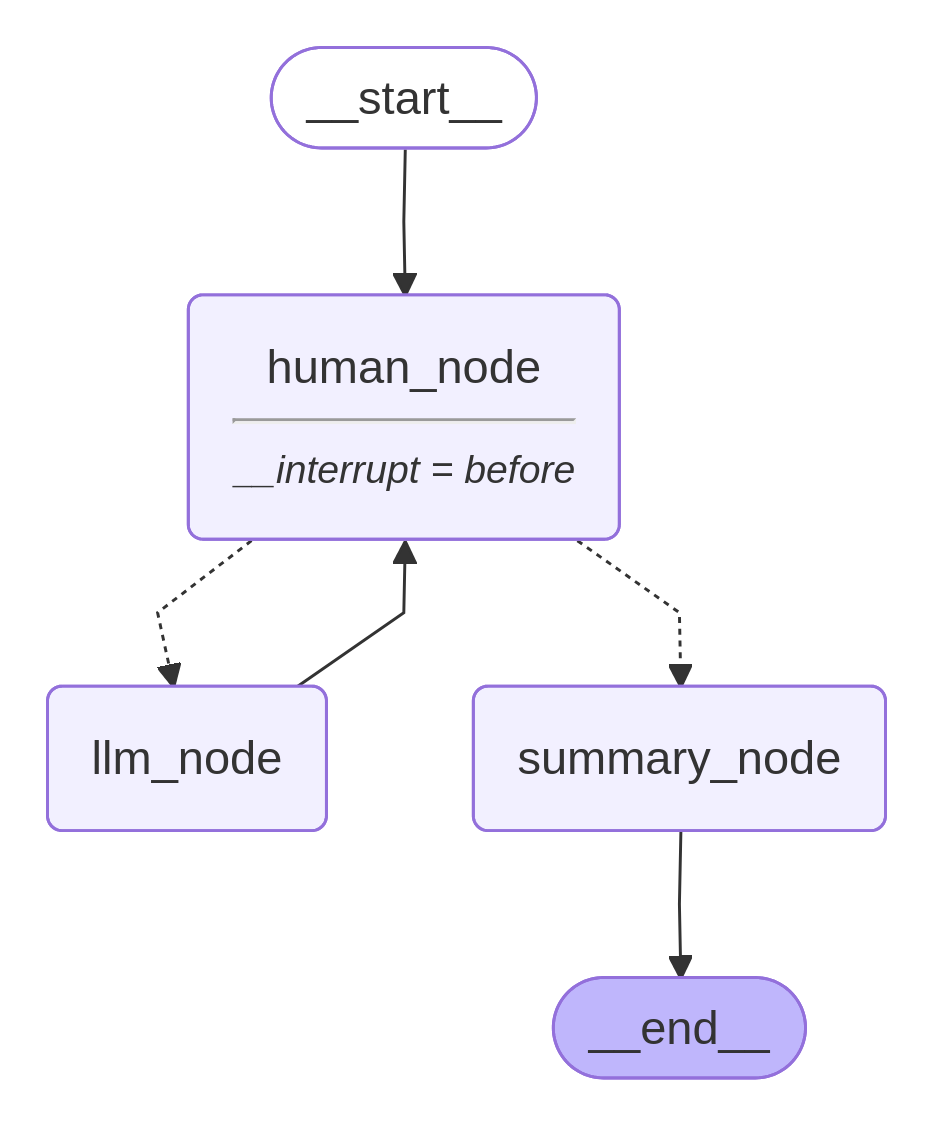

In [6]:
main_subject_bot.display_graph()

In [18]:
thread_id = '/'.join([main_thread_id, init_spec_thread_id, main_subject_thread_id])

In [8]:
ms_chat_actions = ChatInterface(main_subject_bot, 
                    accept_button_msg=None, 
                    thread_id=thread_id, 
                    template_inputs=template_inputs)

HTML(value='\n        <style>\n            .cell-output-ipywidget-background {\n            background-color: …

In [9]:
template_inputs['main_subject'] = main_subject_bot.get_state(thread_id=thread_id)['summary'].main_subject

In [19]:
for msg_source, msg_content, _ in main_subject_bot.get_messages(thread_id=thread_id):
    print("-"*40)
    print(f"{msg_source}:\n")
    for line in msg_content.split("\n"):
        print(f"    {line}")

----------------------------------------
system:

    You are an Editor of a guide book writing process. The customer already provided title and general description for a guide you are going to write.
    
    - Title: "About Prompt Engineering"
    - General description: Guide should cover widly concepts of prompt engineering, with focus on specific prompt engineering techniques and their variations, 
    try to cover as many of them as you can. Target audience is not defined, so potential readers would be as well non-technical as technical.
    Enrich every technique with examples. Write also something about how LLMs work, and how prompt engineering can help to improve their performance.
    
    Using provided information write in a few words (not longer than one sentence) what is the main subject of the guide.
    You may receive some guides how to change it, but you can only response by providing only the main subject description without any additional content.
    Don't be descri

## Subject details

In [7]:
from fcgb.chatbots.specbots import SubjectDetailsSpecBot
from fcgb.chatbots.chat import ChatInterface

subject_details_thread_id = 'sub_det1'

subject_details_bot = SubjectDetailsSpecBot(llm=llm, memory=memory)

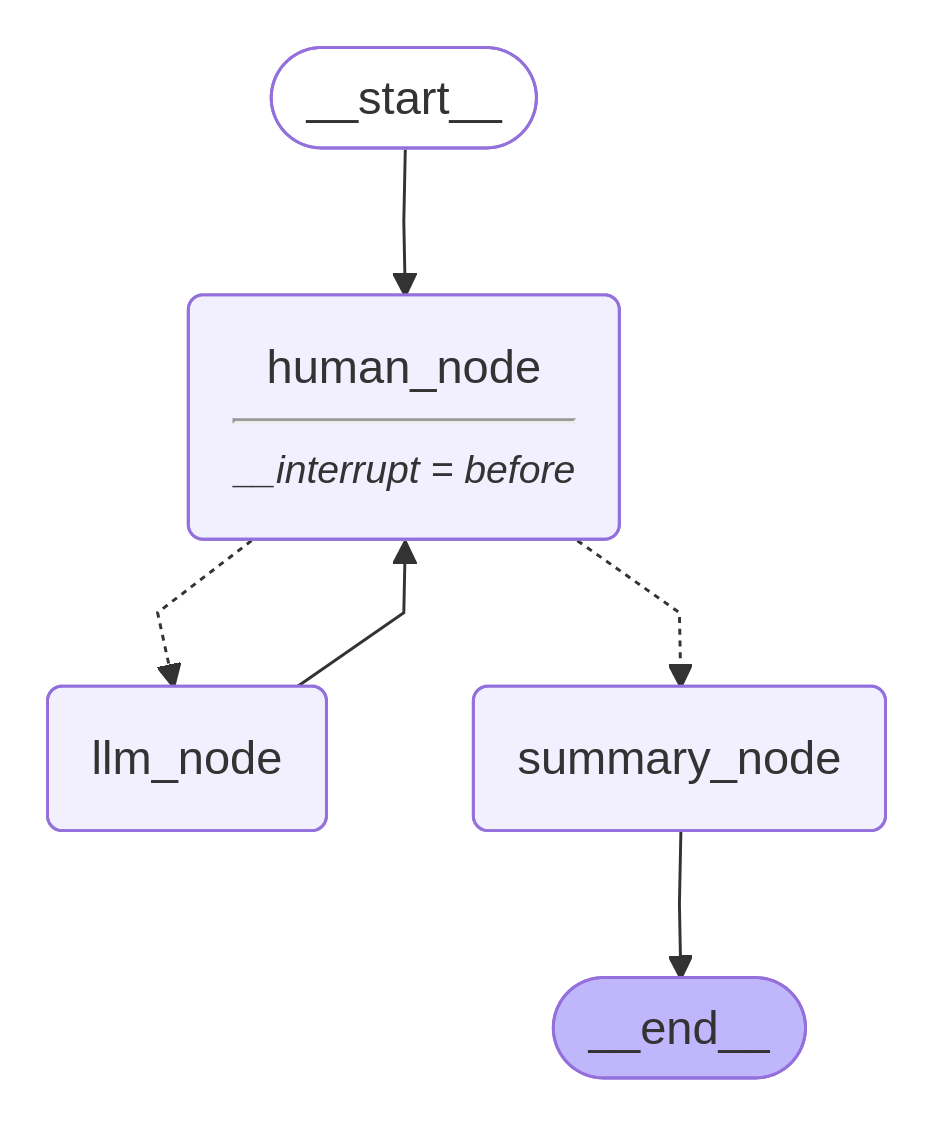

In [9]:
subject_details_bot.display_graph()

In [8]:
thread_id = '/'.join([main_thread_id, init_spec_thread_id, subject_details_thread_id])

In [12]:
sd_chat_actions = ChatInterface(subject_details_bot, 
                    accept_button_msg=None, 
                    thread_id=thread_id, 
                    template_inputs=template_inputs)

HTML(value='\n        <style>\n            .cell-output-ipywidget-background {\n            background-color: …

In [ ]:
sd_chat_actions.summary

In [17]:
for msg_source, msg_content, _ in subject_details_bot.get_messages(thread_id=thread_id):
    print("-"*40)
    print(f"{msg_source}:\n")
    for line in msg_content.split("\n"):
        print(f"    {line}")

----------------------------------------
system:

    You are an Editor of a guide book writing process. At this stage you are conducting conversation with the customer who is ordering this guide.
    
    Here are some pieces of information already given by the customer:
    - Title: "About Prompt Engineering"
    - Main subject: Mastering prompt engineering techniques: a comprehensive guide for all skill levels
    - General description: Guide should cover widly concepts of prompt engineering, with focus on specific prompt engineering techniques and their variations, 
    try to cover as many of them as you can. Target audience is not defined, so potential readers would be as well non-technical as technical.
    Enrich every technique with examples. Write also something about how LLMs work, and how prompt engineering can help to improve their performance.
    
    --------
    
    Now your task is to extract details about how this guide should look like. The list below provides on w

In [14]:
subject_details = subject_details_bot.get_state(thread_id)['summary']

template_inputs['content_description'] = subject_details.content
template_inputs['style'] = subject_details.style
template_inputs['target_audience'] = subject_details.target_audience
template_inputs['layout'] = subject_details.layout
template_inputs['restrictions'] = subject_details.restrictions

In [15]:
template_inputs

{'main_title': 'About Prompt Engineering',
 'initial_description': 'Guide should cover widely concepts of prompt engineering, with focus on specific prompt engineering techniques and their variations, \ntry to cover as many of them as you can. Target audience is not defined, so potential readers would be as well non-technical as technical.\nEnrich every technique with examples. Write also something about how LLMs work, and how prompt engineering can help to improve their performance.',
 'customer_name': 'Fzzy',
 'main_subject': 'Mastering prompt engineering techniques: a comprehensive guide for all skill levels',
 'content_description': '*   Broad overview of prompt engineering techniques [essential]\n*   Comprehensive guide from beginner to expert [essential]\n*   Everything relevant to writing great and accurate prompts [essential]\n*   Detailed breakdown of techniques with multiple variations and real-world examples [essential]\n*   Information about how prompting may influence tech

## Personas

In [10]:
from fcgb.chatbots.specbots import PersonasSpecBot
from fcgb.chatbots.chat import ChatInterface

personas_thread_id = 'per1'

personas_bot = PersonasSpecBot(llm=llm, memory=memory)

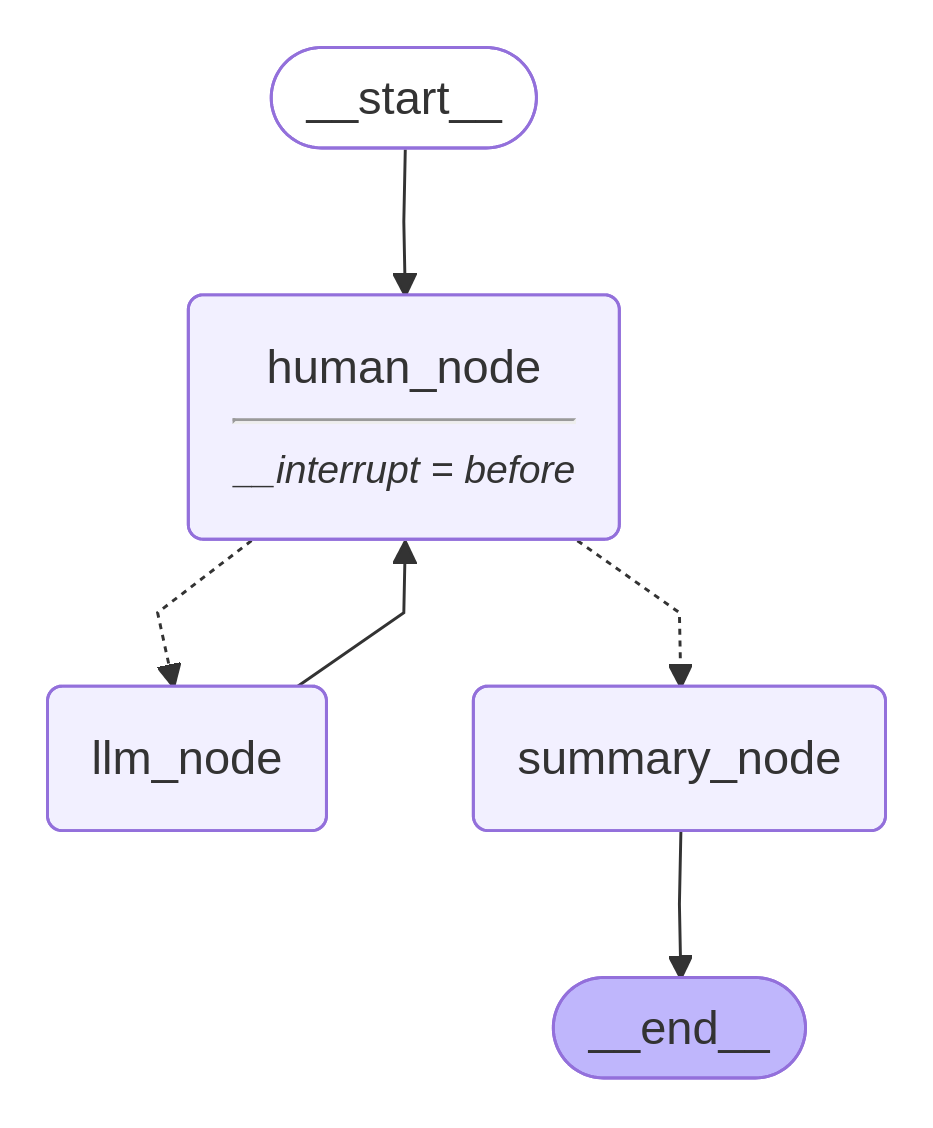

In [11]:
personas_bot.display_graph()

In [21]:
thread_id = '/'.join([main_thread_id, init_spec_thread_id, personas_thread_id])

In [22]:
per_chat_actions = ChatInterface(personas_bot, 
                    accept_button_msg=None, 
                    thread_id=thread_id, 
                    template_inputs=template_inputs)

HTML(value='\n        <style>\n            .cell-output-ipywidget-background {\n            background-color: …

In [ ]:
per_chat_actions.summary.workers

[PersonaModel(nickname='Eager Ellie', proffesion_description='Marketing Assistant - Ellie supports the marketing team by managing social media, scheduling content, and assisting with campaign execution', knowledge_level='Beginner - Ellie has heard about AI and prompt engineering but has no practical experience. She understands the basic concepts of AI generating content', motivation='Ellie wants to learn the fundamentals of prompt engineering to create engaging social media content and automate content creation tasks. She hopes to gain confidence in using AI tools and improve her overall marketing skills'),
 PersonaModel(nickname='Corporate Chris', proffesion_description='Strategy Executive - Chris is responsible for identifying new opportunities and strategies for business growth and innovation', knowledge_level='Basic - Chris understands the high-level potential of AI and prompt engineering for business but needs to understand the practical applications and limitations', motivation='

In [16]:
workers = subject_details_bot.get_state(thread_id)['summary'].workers

template_inputs['workers'] = workers

In [17]:
template_inputs

{'main_title': 'About Prompt Engineering',
 'initial_description': 'Guide should cover widely concepts of prompt engineering, with focus on specific prompt engineering techniques and their variations, \ntry to cover as many of them as you can. Target audience is not defined, so potential readers would be as well non-technical as technical.\nEnrich every technique with examples. Write also something about how LLMs work, and how prompt engineering can help to improve their performance.',
 'customer_name': 'Fzzy',
 'main_subject': 'Mastering prompt engineering techniques: a comprehensive guide for all skill levels',
 'content_description': '*   Broad overview of prompt engineering techniques [essential]\n*   Comprehensive guide from beginner to expert [essential]\n*   Everything relevant to writing great and accurate prompts [essential]\n*   Detailed breakdown of techniques with multiple variations and real-world examples [essential]\n*   Information about how prompting may influence tech

In [23]:
for msg_source, msg_content, _ in personas_bot.get_messages(thread_id=thread_id):
    print("-"*40)
    print(f"{msg_source}:\n")
    for line in msg_content.split("\n"):
        print(f"    {line}")

----------------------------------------
system:

    You are a Recruiter of a focus group that should represent target audience for a book that is being written.
    Your goal is to define 4 personas to form focus group by a conversation with a customer who ordered the book.
    When proposing personas set take into account that they should cover different different backgrounds, knowledge levels or motivations but within limitations set by a customer.
    
    -----
    
    Every persona definition consists of following fields:
    - nickname: think of some creative nickname;
    - proffesion description: think of some profession and describe it in a sentence or two;
    - knowledge level: set some knowledge level with respect to book objects in a descriptive way;
    - motivation: what persona would like to achieve by reading the book, what are their goals;
    
    -----
    
    Here are some pieces of information about the book that are already given by the customer:
    - Title:

## Restrictions

In [13]:
from fcgb.chatbots.specbots import RestrictionsSpecBot
from fcgb.chatbots.chat import ChatInterface

restrictions_thread_id = 'res1'

restrictions_bot = RestrictionsSpecBot(llm=llm, memory=memory)

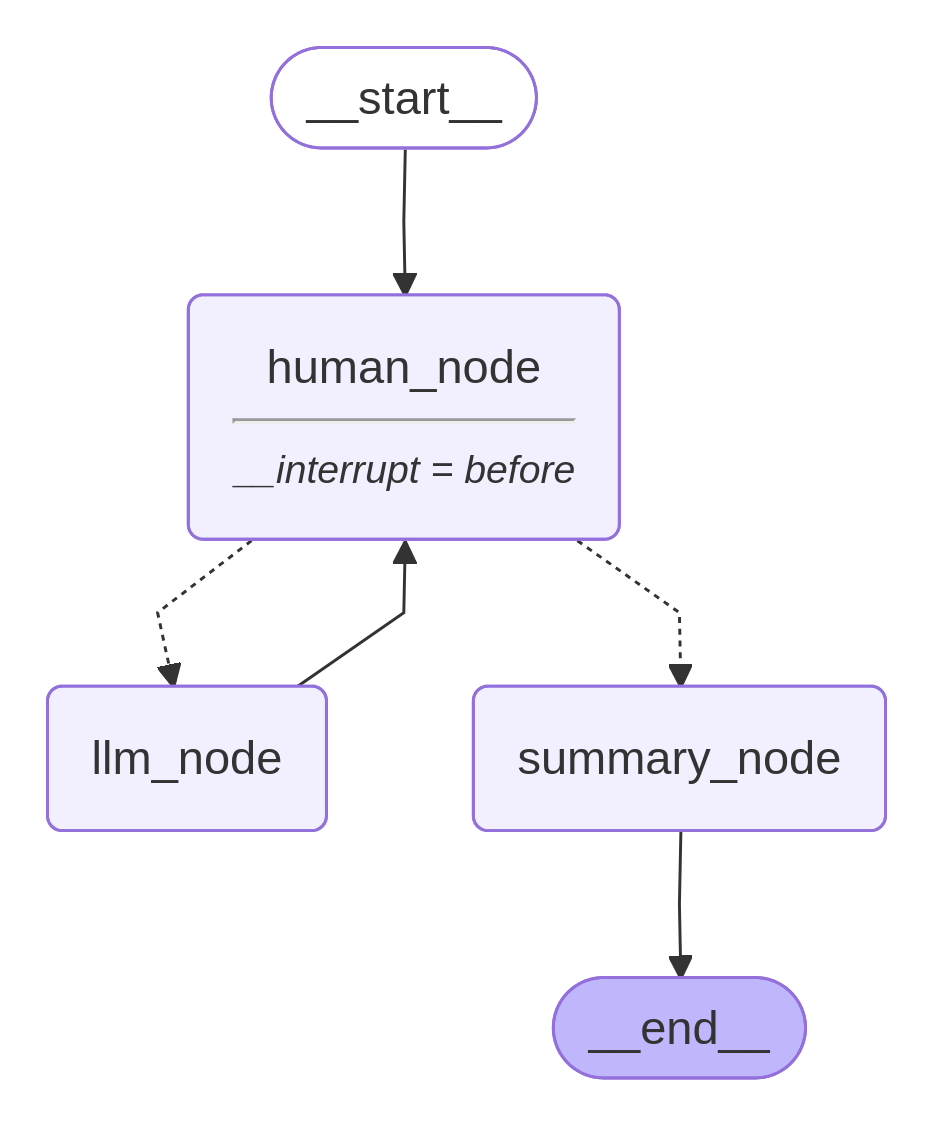

In [14]:
restrictions_bot.display_graph()

In [25]:
thread_id = '/'.join([main_thread_id, init_spec_thread_id, restrictions_thread_id])

In [26]:
res_chat_actions = ChatInterface(restrictions_bot, 
                    accept_button_msg=None, 
                    thread_id=thread_id, 
                    template_inputs=template_inputs)

HTML(value='\n        <style>\n            .cell-output-ipywidget-background {\n            background-color: …

In [21]:
res_chat_actions.summary.restrictions

['No deep-dive into LLM architecture beyond the introduction.',
 'Avoid sections focused on LLM usage for specific industries or professional fields (e.g., law, medicine, finance). Examples of techniques are allowed, but they should not be the primary focus.',
 'Avoid including techniques that are actually LLM weights fine-tuning methods (as opposed to prompt engineering techniques).',
 'Avoid sections heavily reliant on bullet points, code snippets, or examples. Aim for a balance that prioritizes descriptive explanations.',
 'Prioritize practical, real-world examples from professional environments. Avoid simplistic or "toy" examples.',
 'Explain advanced technical concepts in a simplified manner, focusing on how to use the prompting techniques rather than the underlying technical details of how they affect the model.']

In [22]:
restrictions = restrictions_bot.get_state(thread_id)['summary'].restrictions

template_inputs['restrictions'] = restrictions

In [27]:
for msg_source, msg_content, _ in restrictions_bot.get_messages(thread_id=thread_id):
    print("-"*40)
    print(f"{msg_source}:\n")
    for line in msg_content.split("\n"):
        print(f"    {line}")

----------------------------------------
system:

    You play a role of a Reviewer of a guide book that is being written.
    Your goal is to during the conversation with the customer extract any restrictions that will have to be watched over during planning and content writing.
    By restrictions you should understand:
    - subjects to avoid
    - chapters format
    - language used: formal/informal, casual/techniqal
    
    Be careful to not duplicate information already provided but use it to ask questions adjusted to current book specification.
    
    -----
    
    Here are some pieces of information about the book that are already given by the customer:
    - Title: "About Prompt Engineering"
    - Main subject: Mastering prompt engineering techniques: a comprehensive guide for all skill levels
    - General description: Guide should cover widely concepts of prompt engineering, with focus on specific prompt engineering techniques and their variations, 
    try to cover as m